In [1]:
import pandas as pd

## Number of deaths by risk factor

In [2]:
df_number_of_deaths_by_risk_factor = pd.read_csv('../data/Air-pollution/number-of-deaths-by-risk-factor.csv')
df_number_of_deaths_by_risk_factor

,Entity,Code,Year,Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number),...,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,3169,25633,1045,7077,356,3185,3702,...,9518,2798,4825,174,389,2016,7686,107,2216,564
1,Afghanistan,AFG,1991,3222,25872,1055,7149,364,3248,4309,...,9489,3254,5127,188,389,2056,7886,121,2501,611
2,Afghanistan,AFG,1992,3395,26309,1075,7297,376,3351,5356,...,9528,4042,5889,211,393,2100,8568,150,3053,700
3,Afghanistan,AFG,1993,3623,26961,1103,7499,389,3480,7152,...,9611,5392,7007,232,411,2316,9875,204,3726,773
4,Afghanistan,AFG,1994,3788,27658,1134,7698,399,3610,7192,...,9675,5418,7421,247,413,2665,11031,204,3833,812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,2835,11483,1063,1354,4854,1820,4336,...,5636,2879,4328,1068,407,138,730,21,734,282
6836,Zimbabwe,ZWE,2016,2781,11663,1082,1383,4915,1854,4244,...,5849,2798,4295,1042,415,101,674,20,700,275
6837,Zimbabwe,ZWE,2017,2700,11819,1098,1409,4992,1883,4193,...,6047,2744,4251,1007,424,82,629,19,678,267
6838,Zimbabwe,ZWE,2018,2669,12002,1117,1439,5044,1917,4013,...,6248,2608,4153,969,434,85,607,17,644,261


In [3]:
df_number_of_deaths_by_risk_factor['Entity'].unique()

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Asia & Pacific (WB)',
       'Eastern Mediterranean Region (WHO)', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Eu

In [4]:
df_number_of_deaths_by_risk_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 31 columns):
 #   Column                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                            --------------  ----- 
 0   Entity                                                                                                            6840 non-null   object
 1   Code                                                                                                              6150 non-null   object
 2   Year                                                                                                              6840 non-null   int64 
 3   Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)              6840 non-null   int64 
 4   Deaths - Cause: All causes - Risk: H

In [5]:
df_number_of_deaths_by_risk_factor.rename(columns={
    'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)': 'Outdoor air pollution',
    'Deaths - Cause: All causes - Risk: High systolic blood pressure - Sex: Both - Age: All Ages (Number)': 'High systolic blood pressure',
    'Deaths - Cause: All causes - Risk: Diet high in sodium - Sex: Both - Age: All Ages (Number)': 'Diet high in sodium',
    'Deaths - Cause: All causes - Risk: Diet low in whole grains - Sex: Both - Age: All Ages (Number)': 'Diet low in whole grains',
    'Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)': 'Alcohol use',
    'Deaths - Cause: All causes - Risk: Diet low in fruits - Sex: Both - Age: All Ages (Number)': 'Diet low in fruits',
    'Deaths - Cause: All causes - Risk: Unsafe water source - Sex: Both - Age: All Ages (Number)': 'Unsafe water source',
    'Deaths - Cause: All causes - Risk: Secondhand smoke - Sex: Both - Age: All Ages (Number)': 'Secondhand smoke',
    'Deaths - Cause: All causes - Risk: Low birth weight - Sex: Both - Age: All Ages (Number)': 'Low birth weight',
    'Deaths - Cause: All causes - Risk: Child wasting - Sex: Both - Age: All Ages (Number)': 'Child wasting',
    'Deaths - Cause: All causes - Risk: Unsafe sex - Sex: Both - Age: All Ages (Number)': 'Unsafe sex',
    'Deaths - Cause: All causes - Risk: Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)': 'Diet low in nuts and seeds',
    'Deaths - Cause: All causes - Risk: Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)': 'Household air pollution from solid fuels',
    'Deaths - Cause: All causes - Risk: Diet low in vegetables - Sex: Both - Age: All Ages (Number)': 'Diet low in vegetables',
    'Deaths - Cause: All causes - Risk: Low physical activity - Sex: Both - Age: All Ages (Number)': 'Low physical activity',
    'Deaths - Cause: All causes - Risk: Smoking - Sex: Both - Age: All Ages (Number)': 'Smoking',
    'Deaths - Cause: All causes - Risk: High fasting plasma glucose - Sex: Both - Age: All Ages (Number)': 'High fasting plasma glucose',
    'Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: All Ages (Number)': 'Air pollution',
    'Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: All Ages (Number)': 'High body-mass index',
    'Deaths - Cause: All causes - Risk: Unsafe sanitation - Sex: Both - Age: All Ages (Number)': 'Unsafe sanitation',
    'Deaths - Cause: All causes - Risk: No access to handwashing facility - Sex: Both - Age: All Ages (Number)': 'No access to handwashing facility',
    'Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)': 'Drug use',
    'Deaths - Cause: All causes - Risk: Low bone mineral density - Sex: Both - Age: All Ages (Number)': 'Low bone mineral density',
    'Deaths - Cause: All causes - Risk: Vitamin A deficiency - Sex: Both - Age: All Ages (Number)': 'Vitamin A deficiency',
    'Deaths - Cause: All causes - Risk: Child stunting - Sex: Both - Age: All Ages (Number)': 'Child stunting',
    'Deaths - Cause: All causes - Risk: Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)': 'Discontinued breastfeeding',
    'Deaths - Cause: All causes - Risk: Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)': 'Non-exclusive breastfeeding',
    'Deaths - Cause: All causes - Risk: Iron deficiency - Sex: Both - Age: All Ages (Number)': 'Iron deficiency',
}, inplace=True)

In [6]:
del df_number_of_deaths_by_risk_factor['Code']

In [7]:
df_number_of_deaths_by_risk_factor.drop(columns=[
    'Low physical activity',
    'Non-exclusive breastfeeding',
    'Child wasting',
    'High systolic blood pressure',
    'High fasting plasma glucose',
    'Child stunting',
    'High body-mass index',
    'Secondhand smoke',
    'Diet low in fruits',
    'Diet high in sodium',
    'Drug use',
    'Household air pollution from solid fuels',
    'Low bone mineral density',
    'Smoking',
    'Vitamin A deficiency',
    'Unsafe sanitation',
    'Unsafe water source',
    'Diet low in vegetables',
    'Low birth weight',
    'Diet low in nuts and seeds',
    'Diet low in whole grains',
    'Alcohol use',
    'No access to handwashing facility',
    'Discontinued breastfeeding',
    'Iron deficiency',
    'Unsafe sex',
    'Outdoor air pollution'
], inplace=True)

In [8]:
df_number_of_deaths_by_risk_factor

,Entity,Year,Air pollution
0,Afghanistan,1990,37231
1,Afghanistan,1991,38315
2,Afghanistan,1992,41172
3,Afghanistan,1993,44488
4,Afghanistan,1994,46634
...,...,...,...
6835,Zimbabwe,2015,13246
6836,Zimbabwe,2016,13131
6837,Zimbabwe,2017,12926
6838,Zimbabwe,2018,12745


In [9]:
def dub():
  cont_L = 0
  value = 0
  dict_ = {}

  for i in range(6840):
    dict_[i] = value
    cont_L += 1

    if cont_L == 30:
      value += 1
      cont_L = 0
  
  return dict_

In [10]:
df_number_of_deaths_by_risk_factor.insert(0, 'Entity code', pd.Series(dub()))

In [11]:
df_number_of_deaths_by_risk_factor # Usar este dataframe

,Entity code,Entity,Year,Air pollution
0,0,Afghanistan,1990,37231
1,0,Afghanistan,1991,38315
2,0,Afghanistan,1992,41172
3,0,Afghanistan,1993,44488
4,0,Afghanistan,1994,46634
...,...,...,...,...
6835,227,Zimbabwe,2015,13246
6836,227,Zimbabwe,2016,13131
6837,227,Zimbabwe,2017,12926
6838,227,Zimbabwe,2018,12745


In [12]:
Brazil = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'Brazil']
del Brazil['Entity']

In [13]:
China = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'China']
del China['Entity']

In [14]:
EUA = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'United States']
del EUA['Entity']

In [15]:
France = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'France']
del France['Entity']

In [16]:
Gana = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'Ghana']
del Gana['Entity']

In [17]:
India = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'India']
del India['Entity']

In [18]:
Nigeria = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'Nigeria']
del Nigeria['Entity']

In [19]:
Rdcongo = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'Democratic Republic of the Congo']
del Rdcongo['Entity']

In [20]:
Southafrica = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'South Africa']
del Southafrica['Entity']

In [21]:
df_number_of_deaths_by_risk_factor['Air pollution'] = df_number_of_deaths_by_risk_factor.iloc[:, 3]
pol_con = df_number_of_deaths_by_risk_factor.set_index(['Entity'])

countrys = list(df_number_of_deaths_by_risk_factor['Entity'].unique())

In [22]:
a = []

for i in countrys:
    
    m = pol_con.loc[i, ['Year', 'Air pollution']]
    
    a.append([i, m.loc[m['Year'] == 2019]['Air pollution'] - m.loc[m['Year'] == 1990]['Air pollution']])


data1 = {'Entity' : [],
         'Absolute change of deaths by air pollution (1990-2019)' : []}


for i in range(len(a)):
    
    data1['Entity'].append(a[i][0])
    data1['Absolute change of deaths by air pollution (1990-2019)'].append(a[i][1][0])
    
    
df1 = pd.DataFrame.from_dict(data1)
df1 = df1.set_index(['Entity'])

print(df1)

                                Absolute change of deaths by air pollution (1990-2019)
Entity                                                                                
Afghanistan                                                                  -198     
African Region (WHO)                                                        28376     
Albania                                                                      -689     
Algeria                                                                      7939     
American Samoa                                                                 -1     
...                                                                           ...     
World Bank Lower Middle Income                                             421070     
World Bank Upper Middle Income                                             -99149     
Yemen                                                                         -38     
Zambia                                     

In [23]:
r = []

for i in countrys:
    
    m = pol_con.loc[i, ['Year', 'Air pollution']]
    
    r.append([i, ((m.loc[m['Year'] == 2019]['Air pollution'] - m.loc[m['Year'] == 1990]['Air pollution']) / m.loc[m['Year'] == 1990]['Air pollution']) * 100])


data2 = {'Entity' : [],
         'Relative change of deaths by air pollution (1990-2019)' : []}


for i in range(len(r)):
    
    data2['Entity'].append(r[i][0])
    data2['Relative change of deaths by air pollution (1990-2019)'].append(r[i][1][0])
    
    
df2 = pd.DataFrame.from_dict(data2)
df2 = df2.set_index(['Entity'])

print(df2)

                                Relative change of deaths by air pollution (1990-2019)
Entity                                                                                
Afghanistan                                                             -0.531815     
African Region (WHO)                                                     3.265866     
Albania                                                                -23.237774     
Algeria                                                                 55.818041     
American Samoa                                                          -6.666667     
...                                                                           ...     
World Bank Lower Middle Income                                          15.193914     
World Bank Upper Middle Income                                          -3.922167     
Yemen                                                                   -0.179059     
Zambia                                     

Mudança absoluta refere-se à simples diferença no indicador em dois períodos no tempo, ou seja,

        absolute change = value of indicator in period 2 - value of indicator in period 1

Mudança relativa expressa a mudança absoluta como uma porcentagem do valor do indicador no período anterior, ou seja,

                                relative change = ((p2 - p1) / p1) * 100

In [24]:
df_ = pd.merge(df1, df2, on='Entity')

In [25]:
df_1990 = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Year'] == 1990]
df_2019 = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Year'] == 2019]

df_1990_2019 = pd.merge(df_1990, df_2019, on='Entity')

In [26]:
del df_1990_2019['Year_x']
del df_1990_2019['Year_y']

In [27]:
df_1990_2019

,Entity code_x,Entity,Air pollution_x,Entity code_y,Air pollution_y
0,0,Afghanistan,37231,0,37033
1,1,African Region (WHO),868866,1,897242
2,2,Albania,2965,2,2276
3,3,Algeria,14223,3,22162
4,4,American Samoa,15,4,14
...,...,...,...,...,...
223,223,World Bank Lower Middle Income,2771307,223,3192377
224,224,World Bank Upper Middle Income,2527914,224,2428765
225,225,Yemen,21222,225,21184
226,226,Zambia,13084,226,11826


In [28]:
df = pd.merge(df_1990_2019, df_, on='Entity')
df.rename(columns={
    'Air pollution_x' : '1990',
    'Air pollution_y' : '2019',
}, inplace=True)

In [29]:
del df['Entity code_y']

In [30]:
df.rename(columns={'Entity code_x' : 'Entity code'}, inplace=True)

In [31]:
df # Usar este dataframe também

,Entity code,Entity,1990,2019,Absolute change of deaths by air pollution (1990-2019),Relative change of deaths by air pollution (1990-2019)
0,0,Afghanistan,37231,37033,-198,-0.531815
1,1,African Region (WHO),868866,897242,28376,3.265866
2,2,Albania,2965,2276,-689,-23.237774
3,3,Algeria,14223,22162,7939,55.818041
4,4,American Samoa,15,14,-1,-6.666667
...,...,...,...,...,...,...
223,223,World Bank Lower Middle Income,2771307,3192377,421070,15.193914
224,224,World Bank Upper Middle Income,2527914,2428765,-99149,-3.922167
225,225,Yemen,21222,21184,-38,-0.179059
226,226,Zambia,13084,11826,-1258,-9.614797


----------------------------------------------------------------------------------------------------------------------

In [32]:
# ----------------------------------------- Graphs ----------------------------------------- #

In [33]:
from ipywidgets import interact

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

In [35]:
def brazil():
    p = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'Brazil'].set_index(['Year'])
    p.drop(columns=['Entity code'], inplace=True)
    return p

def china():
    p = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'China'].set_index(['Year'])
    p.drop(columns=['Entity code'], inplace=True)
    return p

def united_states():
    p = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'United States'].set_index(['Year'])
    p.drop(columns=['Entity code'], inplace=True)
    return p

def france():
    p = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'France'].set_index(['Year'])
    p.drop(columns=['Entity code'], inplace=True)
    return p

def ghana():
    p = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'Ghana'].set_index(['Year'])
    p.drop(columns=['Entity code'], inplace=True)
    return p

def india():
    p = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'India'].set_index(['Year'])
    p.drop(columns=['Entity code'], inplace=True)
    return p

def nigeria():
    P = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'Nigeria'].set_index(['Year'])
    P.drop(columns=['Entity code'], inplace=True)
    return P

def democratic_republic_of_the_congo():
    br = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'Democratic Republic of Congo'].set_index(['Year'])
    br.drop(columns=['Entity code'], inplace=True)
    return br

def south_africa():
    br = df_number_of_deaths_by_risk_factor[df_number_of_deaths_by_risk_factor['Entity'] == 'South Africa'].set_index(['Year'])
    br.drop(columns=['Entity code'], inplace=True)
    return br

def plot_graph(generator):
    g = generator()
    g.plot(ylabel = 'Air pollution (Deaths numbers)', figsize = (20,10))
    plt.show()

In [36]:
interact(plot_graph,
         generator=[
             ('Brazil', brazil),
             ('China', china),
             ('Democratic Republic of the Congo', democratic_republic_of_the_congo),
             ('France', france),
             ('Ghana', ghana),
             ('India', india),
             ('Nigeria', nigeria),
             ('South Africa', south_africa),
             ('United States', united_states)])

interactive(children=(Dropdown(description='generator', options=(('Brazil', <function brazil at 0x000001D5C0F1…

<function __main__.plot_graph(generator)>

----------------------------------------------------------------------------------------------------------------------

## Estudo de caso:

Uso de um modelo de regressão para prever os países com tendências a aumentarem o número de mortes causadas pela poluição do ar doméstica e externa por partículas e ozônio.                                                     
"A poluição do ar é um dos principais fatores de risco de morte no mundo."

Hannah Ritchie and Max Roser (2017) - "Air Pollution". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/air-pollution' [Online Resource]

In [273]:
# Modelo de rede nerual a ser utilizado: Linear Regression

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # importação da função para dividir o dataset em treino e teste
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [276]:
reg = LinearRegression()

----------------------------------------------------------------------------------------------------------------------

## Brazil

In [282]:
X_br = Brazil['Year'].values
Y_br = Brazil['Air pollution'].values

In [274]:
X_train_br, X_test_br, Y_train_br, Y_test_br = train_test_split(X_br, Y_br, test_size=0.3, shuffle=False) # separação dos dados de treino e teste

In [275]:
#Precisamos redimensionar os dados para fazer a regressão linear
X_train_br = X_train_br.reshape(-1,1)
Y_train_br = Y_train_br.reshape(-1,1)
X_test_br = X_test_br.reshape(-1,1)
Y_test_br = Y_test_br.reshape(-1,1)

In [277]:
#treinando o modelo
reg.fit(X_train_br, Y_train_br)
pred_br = reg.predict(X_test_br)

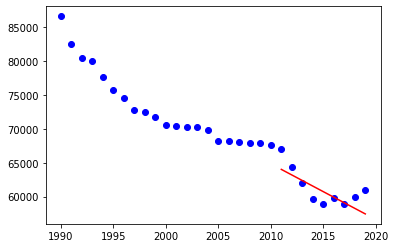

In [278]:
plt.scatter(X_br, Y_br, color='blue')
plt.plot(X_test_br, pred_br, color='red')
# plt.title('')
# plt.xlabel("Índice de Massa Corporal da Cliente")
# plt.ylabel("Custo do Seguro (Dólares)")

In [281]:
r_squared_br = r2_score(Y_test_br, pred_br)
print(f'Coeficiente r2: {r_squared_br}')

Coeficiente r2: 0.45751153758724705


----------------------------------------------------------------------------------------------------------------------

## China

In [451]:
X_ch = China.iloc[:,0:2]
Y_ch = China.iloc[:,2]

In [461]:
X_train_ch, X_test_ch, Y_train_ch, Y_test_ch = train_test_split(X_ch, Y_ch, test_size=0.3, shuffle=False) # separação dos dados de treino e teste

In [465]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor

In [525]:
def mlp(X_train_ch, Y_train_ch):
    print("MLP Regression")
    m = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='identity', max_iter=2000)
    m.fit(X_train_ch, Y_train_ch)
    return m


MLP Regression
Training Score:  -29.231798889016858
Testing Score:  -312.5845500731144
    y_test        y_pred
6  1840441  2.059243e+06
0  1874037  2.053173e+06
7  1828243  2.060255e+06
3  1844224  2.056208e+06
5  1856583  2.058232e+06
8  1848274  2.061267e+06
4  1848574  2.057220e+06
1  1854111  2.054185e+06
2  1845363  2.055197e+06


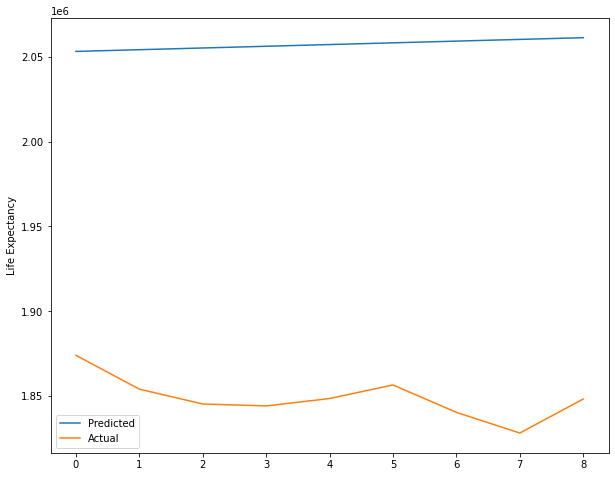

In [526]:

model = mlp(X_train_ch, Y_train_ch)
score = model.score(X_train_ch, Y_train_ch)
print("Training Score: ", score)

y_pred = model.predict(X_test_ch)
r_score = r2_score(Y_test_ch, y_pred)
print("Testing Score: ", r_score)

pred_results = pd.DataFrame({'y_test': Y_test_ch.values.flatten(), 'y_pred': y_pred.flatten()}, index=range(len(y_pred)))
print(pred_results.sample(9))
plt.figure(figsize=(10, 8))
plt.plot(y_pred, label='Predicted')
plt.plot(Y_test_ch.values, label='Actual')
plt.ylabel("Life Expectancy")
plt.legend()
plt.show()

In [363]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import accuracy_score

# X_ch = China.iloc[:,0:2]
# Y_ch = China.iloc[:,2]

# y = pd.get_dummies(Y_ch).values

# import numpy as np

# x_train = X_ch
# labels = y
# CLASSES = 3
# y_train = np.zeros([labels.shape[0], CLASSES])

# for i in range(labels.shape[0]):
#     y_train[i][labels[i]] = 1
#     y_train.view(type=np.matrix)

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,
# test_size=0.3)
# print('Train size: {train}, Test size: {test}'.format(train=x_train.shape[0],
# test=x_test.shape[0]))
# INPUT_LENGHT = x_train.shape[1]
# HIDDEN_UNITS = 22
# Win = np.random.normal(size=[INPUT_LENGHT, HIDDEN_UNITS])
# print('Input Weight shape: {shape}'.format(shape=Win.shape))
# def input_to_hidden(x):
#     a = np.dot(x, Win)
#     a = np.maximum(a, 0, a)
#     return a

# X = input_to_hidden(x_train)
# Xt = np.transpose(X)
# A = np.dot(Xt, X)
# Ai = np.linalg.pinv(A)
# Wout = np.dot(Ai, np.dot(Xt, y_train))
# print('Output weights shape: {shape}'.format(shape=Wout.shape))
# def predict(x):
#     x = input_to_hidden(x)
#     y = np.dot(x, Wout)
#     return y

# #prediction= np.dot(x_test,Wout) # calculo da função linear
# prediction = predict(x_test)
# prediction= 0.5*(np.sign(prediction-0.5)+1) # estou arredonda para zero ou a

# score= accuracy_score(prediction,y_test)
# print(score.mean())


Train size: 21, Test size: 9
Input Weight shape: (2, 22)
Output weights shape: (22, 3)
1.0
